# Open University Learning Analytics dataset
 Dataset (OULAD).It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by "B" and "J" respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

## Step 1: Reading Tables

In [2]:
import pandas as pd
assessments=pd.read_csv('./assessments.csv')
courses=pd.read_csv('./courses.csv')
student_info=pd.read_csv('./studentInfo.csv')
student_registration=pd.read_csv('./studentRegistration.csv')
student_vle=pd.read_csv('./studentVle.csv')
vle=pd.read_csv('./vle.csv')
student_assessment=pd.read_csv('./studentAssessment.csv')

## Step 2: Cleaning and Preprocessing

### Step 2.1: Assesments Table
Contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam
| Column Name| Description|
|------------|------------|
| code_module | identification code of the module, to which the assessment belongs.|
| code_presentation | identification code of the presentation, to which the assessment belongs.|
| id_assessment | identification number of the assessment.|
| assessment_type | type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).|
| date | information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the  presentation has number 0 (zero).|
| weight | weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.|

If the information about the final exam date is missing, it is at the end of the last presentation week.

In [2]:
assessments.sample(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
100,DDD,2014B,25360,TMA,200.0,20.0
143,FFF,2013J,34883,CMA,236.0,0.0
190,GGG,2014B,37432,CMA,222.0,0.0
119,EEE,2014J,30719,TMA,33.0,16.0
184,GGG,2013J,37417,TMA,173.0,0.0


In [3]:
assessments.isnull().sum(), assessments.duplicated().sum(), assessments.shape

(code_module           0
 code_presentation     0
 id_assessment         0
 assessment_type       0
 date                 11
 weight                0
 dtype: int64,
 np.int64(0),
 (206, 6))

In [4]:
#fill missing values in 'date' column with -1 referring that the date for those is at the last week of the course
assessments['date'].fillna(-1, inplace=True)

C:\Users\AmrKhaled\AppData\Local\Temp\ipykernel_26380\263785676.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  assessments['date'].fillna(-1, inplace=True)


In [5]:
# copying original dataframes to new variables to keep the original data intact
assessments_clean=assessments.copy()

In [6]:
assessments_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [7]:
assessments_clean.describe()

,id_assessment,date,weight
count,206.000000,206.000000,206.000000
mean,26473.975728,137.208738,20.873786
std,10098.625521,80.925983,30.384224
min,1752.000000,-1.000000,0.000000
25%,15023.250000,61.000000,0.000000
50%,25364.500000,147.500000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [8]:
assessments_clean.describe(include='object')

,code_module,code_presentation,assessment_type
count,206,206,206
unique,7,4,3
top,FFF,2014J,TMA
freq,52,57,106


In [9]:
assessments_clean['assessment_type']=assessments_clean['assessment_type'].map({'TMA':1,'CMA':0,'Exam':2})
assessments_clean['code_module']=assessments_clean['code_module'].map({'AAA':0,'BBB':1,'CCC':2,'DDD':3,'EEE':4,'FFF':5,'GGG':6})

In [10]:
assessments_clean.sample(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
79,3,2013B,25346,0,170.0,3.0
82,3,2013B,25335,1,53.0,10.0
53,1,2014J,15025,2,-1.0,100.0
67,2,2014J,24298,0,214.0,8.0
58,2,2014B,24282,1,32.0,9.0


### Step 2.2: Courses Table
Contains the list of all available modules and their presentations.
| Columns|Description|
|--------|-----------|
| code_module | code name of the module, which serves as the identifier.|
| code_presentation | code name of the presentation. It consists of the year and "B" for the presentation starting in February and "J" for the presentation starting in October.|
| length | length of the module-presentation in days.|

The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.

In [11]:
courses.sample(5)

,code_module,code_presentation,module_presentation_length
8,DDD,2013J,261
6,CCC,2014J,269
20,GGG,2014J,269
1,AAA,2014J,269
0,AAA,2013J,268


In [12]:
courses.isna().sum(), courses.duplicated().sum(), courses.shape

(code_module                   0
 code_presentation             0
 module_presentation_length    0
 dtype: int64,
 np.int64(0),
 (22, 3))

In [13]:
courses["presentation_period"] = (courses["code_presentation"].apply(lambda x: f"{x[:4]}-02" if x.endswith("B") else f"{x[:4]}-10"))

In [14]:
courses_clean = courses.copy()

In [15]:
courses_clean['code_module']=courses_clean['code_module'].map({'AAA':0,'BBB':1,'CCC':2,'DDD':3,'EEE':4,'FFF':5,'GGG':6})

In [16]:
courses_clean.sample(5)

,code_module,code_presentation,module_presentation_length,presentation_period
9,3,2014J,262,2014-10
21,6,2014B,241,2014-02
19,6,2013J,261,2013-10
1,0,2014J,269,2014-10
6,2,2014J,269,2014-10


### Step 2.3: Student_info Table
Contains demographic information about the students together with their results.
| Columns | Description|
|---------|------------|
| code_module | an identification code for a module on which the student is registered.|
| code_presentation | the identification code of the presentation during which the student is registered on the module.|
| id_student | a unique identification number for the student.|
| gender | the student's gender.|
| region | identifies the geographic region, where the student lived while taking the module-presentation.|
| highest_education | highest student education level on entry to the module presentation.|
| imd_band | specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.|
| age_band | band of the student's age.|
| num_of_prev_attempts | the number times the student has attempted this module.|
| studied_credits | the total number of credits for the modules the student is currently studying.|
| disability | indicates whether the student has declared a disability.|
| final_result | student's final result in the module-presentation.|

In [17]:
student_info.isna().sum(), student_info.duplicated().sum(), student_info.shape

(code_module                0
 code_presentation          0
 id_student                 0
 gender                     0
 region                     0
 highest_education          0
 imd_band                1111
 age_band                   0
 num_of_prev_attempts       0
 studied_credits            0
 disability                 0
 final_result               0
 dtype: int64,
 np.int64(0),
 (32593, 12))

In [18]:
#replacing missing values in 'imd_band' column with mode value
student_info['imd_band'].fillna(student_info['imd_band'].mode()[0], inplace=True)

C:\Users\AmrKhaled\AppData\Local\Temp\ipykernel_26380\14970525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_info['imd_band'].fillna(student_info['imd_band'].mode()[0], inplace=True)


In [19]:
student_info.sample(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
23638,FFF,2013B,558244,M,Wales,HE Qualification,40-50%,0-35,0,60,N,Withdrawn
14863,DDD,2013J,465399,F,East Midlands Region,Lower Than A Level,50-60%,0-35,3,60,Y,Withdrawn
11597,CCC,2014J,589634,M,South West Region,A Level or Equivalent,60-70%,0-35,0,90,N,Distinction
234,AAA,2013J,969076,M,South West Region,A Level or Equivalent,80-90%,35-55,0,180,N,Withdrawn
8469,BBB,2014J,699436,F,East Midlands Region,HE Qualification,60-70%,35-55,0,120,N,Distinction


In [20]:
student_info_clean = student_info.copy()

In [21]:
student_info_clean.describe(include='O')

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
count,32593,32593,32593,32593,32593,32593,32593,32593,32593
unique,7,4,2,13,5,10,3,2,4
top,BBB,2014J,M,Scotland,A Level or Equivalent,20-30%,0-35,N,Pass
freq,7909,11260,17875,3446,14045,4765,22944,29429,12361


In [22]:
student_info_clean['imd_band'].value_counts()

imd_band
20-30%     4765
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: count, dtype: int64

In [23]:
# converting categorical columns to numerical values as preprocessing step
student_info_clean['gender']=student_info_clean['gender'].map({'M':'1','F':'0'})
student_info_clean['disability']=student_info_clean['disability'].map({'Y':'1','N':'0'})
student_info_clean['final_result']=student_info_clean['final_result'].map({'Pass':'2','Fail':'0','Withdrawn':'1','Distinction':'3'})
student_info_clean['highest_education']=student_info_clean['highest_education'].map({'No Formal quals':0,'Lower Than A Level':1,
                                                                                     'A Level or Equivalent':2,'HE Qualification':3,'Post Graduate Qualification':4})
student_info_clean['imd_band']=student_info_clean['imd_band'].map({'0-10%':0,'10-20%':1,'20-30%':2,'30-40%':3,'40-50%':4,'50-60%':5,
                                                                   '60-70%':6,'70-80%':7,'80-90%':8,'90-100%':9})

student_info_clean['code_module']=student_info_clean['code_module'].map({'AAA':0,'BBB':1,'CCC':2,'DDD':3,'EEE':4,'FFF':5,'GGG':6})

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
student_info_clean['region']=le.fit_transform(student_info_clean['region'])

In [24]:
student_info_clean.sample(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
29837,5,2014J,698237,0,5,3,5.0,0-35,0,60,0,1
4002,1,2013J,593443,0,6,1,NaN,0-35,0,60,0,1
21699,4,2014J,649783,1,3,2,2.0,0-35,0,120,0,1
10527,2,2014B,2498388,0,4,1,2.0,0-35,0,30,1,2
11274,2,2014J,549783,1,0,1,7.0,0-35,0,30,0,3


### Step 2.4: Student VLE Table
Contains information about each student's interactions with the materials in the VLE.
|Columns|Description|
|-------|-----------|
|code_module | an identification code for a module.|
|code_presentation | the identification code of the module presentation.|
|id_student | a unique identification number for the student.|
|id_site | an identification number for the VLE material.|
|date | the date of student's interaction with the material measured as the number of days since the start of the module-presentation.|
|sum_click | the number of times a student interacts with the material in that day.|

In [25]:
student_vle.sample(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
5429045,EEE,2013J,611344,551011,53,4
963960,BBB,2013J,560773,703737,86,1
6187817,EEE,2014J,646197,832713,172,1
9231873,FFF,2014J,656353,882545,11,1
5125520,DDD,2014J,627236,813701,150,5


In [26]:
student_vle.isna().sum(), student_vle.duplicated().sum(), student_vle.shape

(code_module          0
 code_presentation    0
 id_student           0
 id_site              0
 date                 0
 sum_click            0
 dtype: int64,
 np.int64(787170),
 (10655280, 6))

In [27]:
# Dropping duplicate rows
student_vle.drop_duplicates(inplace=True)
student_vle.duplicated().sum(),student_vle.shape

(np.int64(0), (9868110, 6))

In [29]:
# checking for duplicates based on subset of columns
student_vle.duplicated(subset=['id_student', 'code_presentation','id_site', 'date','code_module']).sum()

np.int64(1408790)

In [30]:
# aggregating duplicate rows based on subset of columns
student_vle= (
    student_vle
    .groupby(['id_student', 'id_site', 'date','code_module','code_presentation'], as_index=False)
    .agg({'sum_click': 'sum'})
)

In [119]:
# checking for duplicates again
student_vle.duplicated(subset=['id_student', 'code_presentation','id_site', 'date','code_module']).sum()

np.int64(0)

In [32]:
student_vle.sample(5)

,id_student,id_site,date,code_module,code_presentation,sum_click
5423439,619292,790732,141,EEE,2014B,2
2135611,507375,551012,-3,EEE,2013J,27
4356182,590662,661575,106,GGG,2013J,4
4298385,589080,882537,185,FFF,2014J,1
6450842,648898,814211,221,DDD,2014J,5


In [33]:
student_vle_clean = student_vle.copy()

In [34]:
student_vle_clean['code_module']=student_vle_clean['code_module'].map({'AAA':0,'BBB':1,'CCC':2,'DDD':3,'EEE':4,'FFF':5,'GGG':6})

In [35]:
student_vle_clean.sample(5)

,id_student,id_site,date,code_module,code_presentation,sum_click
4629684,597253,661575,179,6,2013J,2
361407,162210,832566,113,4,2014J,3
5374793,617580,882545,15,5,2014J,5
3567476,568775,913534,-9,1,2014J,7
1871137,484594,882547,176,5,2014J,3


### Step 2.5: Student Registration Table
Contains information about the time when the student registered for the module presentation. For students who unregistered the unregistered date is also recorded.
|Columns|Description|
|-------|-----------|
| code_module | an identification code for a module.|
| code_presentation | the identification code of the presentation.|
| id_student | a unique identification number for the student.|
| date_registration | the date of student's registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).|
| date_unregistration | the student's unregistered date from the module presentation, this is the number of days measured relative to the start of the module-presentation.Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.|

In [36]:
student_registration.sample(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
26671,FFF,2014B,567629,-78.0,NaN
31877,GGG,2014J,339645,-29.0,NaN
20234,EEE,2013J,604906,-42.0,NaN
31681,GGG,2014B,631756,-11.0,NaN
17834,DDD,2014J,442017,-23.0,166.0


In [37]:
student_registration.isna().sum(), student_registration.duplicated().sum(), student_registration.shape

(code_module                0
 code_presentation          0
 id_student                 0
 date_registration         45
 date_unregistration    22521
 dtype: int64,
 np.int64(0),
 (32593, 5))

In [38]:
# checking for rows with missing values in 'date_registration' column
student_registration[student_registration['date_registration'].isna()]

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0
5573,BBB,2014B,614270,NaN,-142.0
6295,BBB,2014B,2409808,NaN,-109.0
6305,BBB,2014B,2439442,NaN,-149.0
8307,BBB,2014J,694001,NaN,-36.0
8975,CCC,2014B,394791,NaN,-61.0


In [39]:
# checking for duplicates based on subset of columns
student_registration[student_registration.duplicated(subset=['id_student', 'code_presentation','code_module'])]

,code_module,code_presentation,id_student,date_registration,date_unregistration


In [40]:
student_registration['date_registration'].mean()

np.float64(-69.4113002335013)

In [42]:
# filling missing values
student_registration['date_registration'].fillna(student_registration['date_registration'].mean(), inplace=True)

C:\Users\AmrKhaled\AppData\Local\Temp\ipykernel_26380\981854655.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_registration['date_registration'].fillna(student_registration['date_registration'].mean(), inplace=True)


In [43]:
student_registration.sample(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
15900,DDD,2013J,600686,-66.0,NaN
19267,DDD,2014J,2288599,-136.0,NaN
28757,FFF,2014J,645790,-150.0,NaN
14724,DDD,2013J,382879,-61.0,NaN
26489,FFF,2014B,484292,-172.0,9.0


In [44]:
student_registration_clean = student_registration.copy()

In [45]:
student_registration_clean['code_module']=student_registration_clean['code_module'].map({'AAA':0,'BBB':1,'CCC':2,'DDD':3,'EEE':4,'FFF':5,'GGG':6})

In [46]:
student_registration_clean.sample(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
8135,1,2014J,689095,-11.0,NaN
40,0,2013J,127582,-31.0,NaN
23997,5,2013J,146738,-31.0,NaN
7259,1,2014J,637414,-95.0,NaN
13306,3,2013B,337048,-8.0,199.0


### Step 2.6: VLE Table
Contains information about the available materials in the VLE. Typically, these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded.
|Columns|Description|
|-------|-----------|
|id_site | an identification number of the material.|
|code_module | an identification code for module.|
|code_presentation | the identification code of presentation.|
|activity_type | the role associated with the module material.|
|week_from | the week from which the material is planned to be used.|
|week_to | week until which the material is planned to be used.|

In [47]:
vle.sample(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
2131,547611,DDD,2013B,resource,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
3309,773407,DDD,2014B,resource,NaN,NaN
625,543075,BBB,2013B,subpage,NaN,NaN
5472,779664,FFF,2014B,subpage,NaN,NaN


In [48]:
vle.isna().sum(), vle.duplicated().sum(), vle.shape

(id_site                 0
 code_module             0
 code_presentation       0
 activity_type           0
 week_from            5243
 week_to              5243
 dtype: int64,
 np.int64(0),
 (6364, 6))

In [49]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


In [50]:
#filling missing values in 'week_from' and 'week_to' columns with -1 referring that those materials are available throughout the course duration
vle['week_from'].fillna(-1, inplace=True)
vle['week_to'].fillna(-1, inplace=True)

C:\Users\AmrKhaled\AppData\Local\Temp\ipykernel_26380\3442624229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vle['week_from'].fillna(-1, inplace=True)
C:\Users\AmrKhaled\AppData\Local\Temp\ipykernel_26380\3442624229.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [51]:
vle.sample(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
754,704174,BBB,2013J,resource,-1.0,-1.0
621,542804,BBB,2013B,forumng,-1.0,-1.0
3708,551075,EEE,2013J,page,-1.0,-1.0
3938,832680,EEE,2014J,oucontent,18.0,18.0
4175,527357,FFF,2013B,url,2.0,2.0


In [52]:
vle.describe(include='O')

,code_module,code_presentation,activity_type
count,6364,6364,6364
unique,7,4,20
top,FFF,2013J,resource
freq,1967,1772,2660


In [53]:
vle_clean=vle.copy()

In [54]:
# converting categorical columns to numerical values as preprocessing step
vle_clean['code_module']=vle_clean['code_module'].map({'AAA':0,'BBB':1,'CCC':2,'DDD':3,'EEE':4,'FFF':5,'GGG':6})
vle_clean['activity_type']=le.fit_transform(vle_clean['activity_type'])

In [55]:
vle_clean.sample(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
1611,730010,2,2014B,18,-1.0,-1.0
1436,913522,1,2014J,9,-1.0,-1.0
2754,674294,3,2013J,16,-1.0,-1.0
4027,832667,4,2014J,9,28.0,28.0
755,704044,1,2013J,16,-1.0,-1.0


### Step 2.7: Student Assessment Table
Contains the results of students' assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system.
|Columns|Description|
|-------|-----------|
|id_assessment | the identification number of the assessment.|
|id_student | a unique identification number for the student.|
|date_submitted | the date of student submission, measured as the number of days since the start of the module presentation.|
|is_banked | a status flag indicating that the assessment result has been transferred from a previous presentation.|
|score | the student's score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.|

In [56]:
student_assessment.sample(5)

,id_assessment,id_student,date_submitted,is_banked,score
87405,25360,489507,200,0,59.0
134539,34887,2581536,51,0,80.0
110069,34865,530296,178,0,83.0
22648,15003,444821,56,0,100.0
115069,34870,1510285,216,0,72.0


In [57]:
student_assessment.isna().sum(), student_assessment.duplicated().sum(), student_assessment.shape

(id_assessment       0
 id_student          0
 date_submitted      0
 is_banked           0
 score             173
 dtype: int64,
 np.int64(0),
 (173912, 5))

In [58]:
student_assessment.describe()

,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [59]:
student_assessment['score'].fillna(student_assessment['score'].min(), inplace=True)

C:\Users\AmrKhaled\AppData\Local\Temp\ipykernel_26380\2881344987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_assessment['score'].fillna(student_assessment['score'].min(), inplace=True)


In [60]:
student_assessment_clean = student_assessment.copy()

In [61]:
student_assessment_clean.sample(5)

,id_assessment,id_student,date_submitted,is_banked,score
79881,25351,598536,123,0,18.0
88208,25362,687765,23,0,80.0
163810,37422,581965,199,0,80.0
121969,34876,242491,125,0,88.0
47627,24283,607052,100,0,89.0


#### Box plot for tables

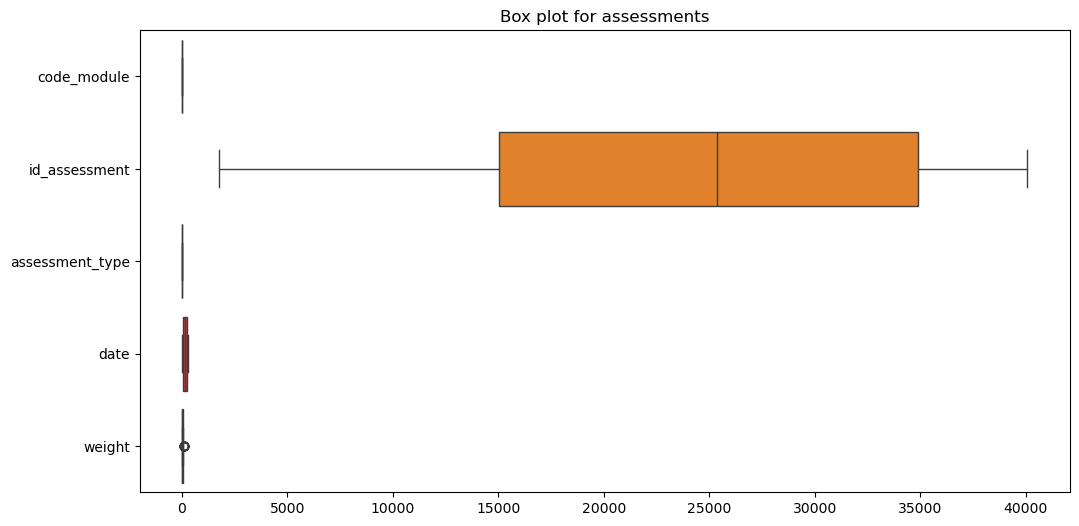

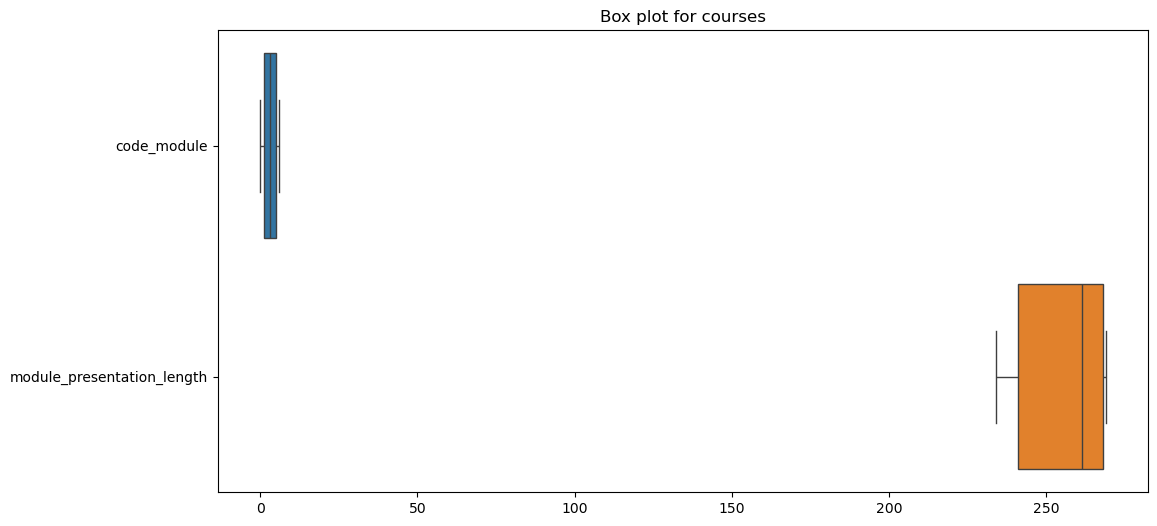

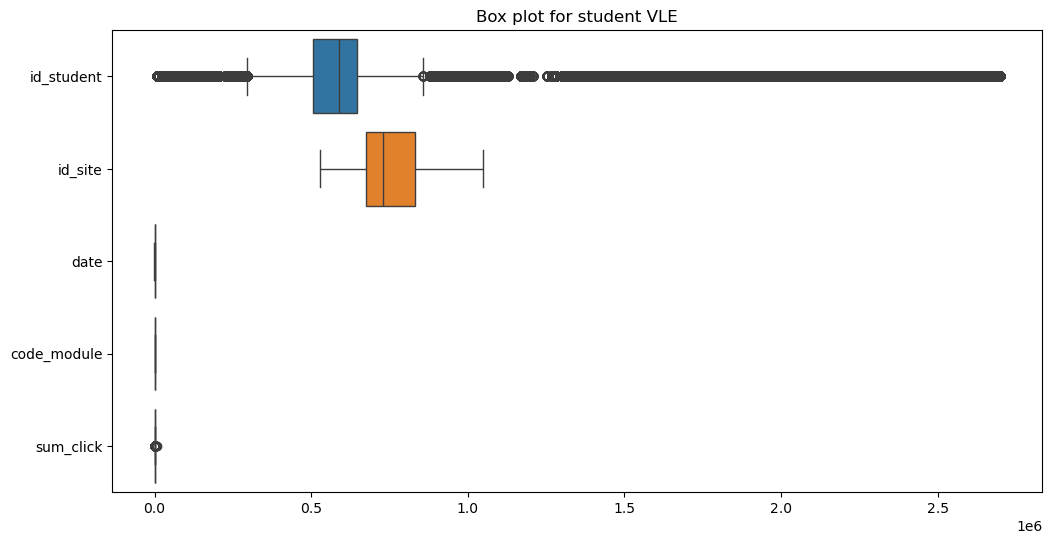

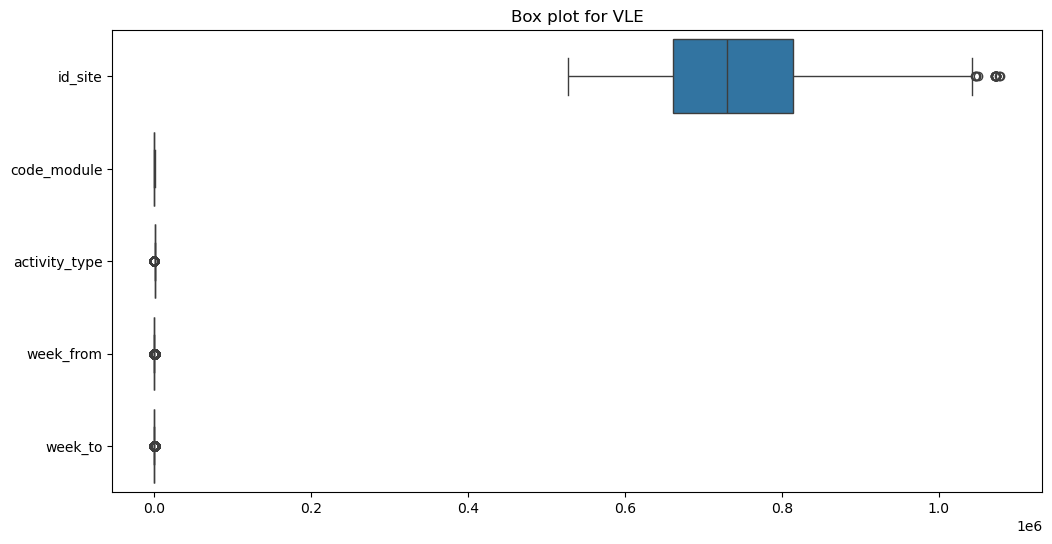

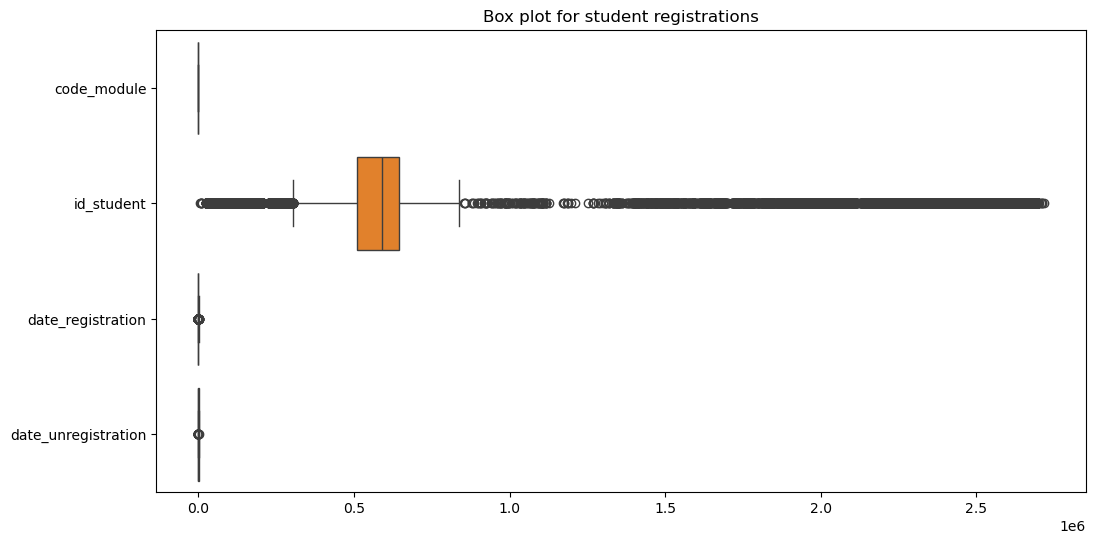

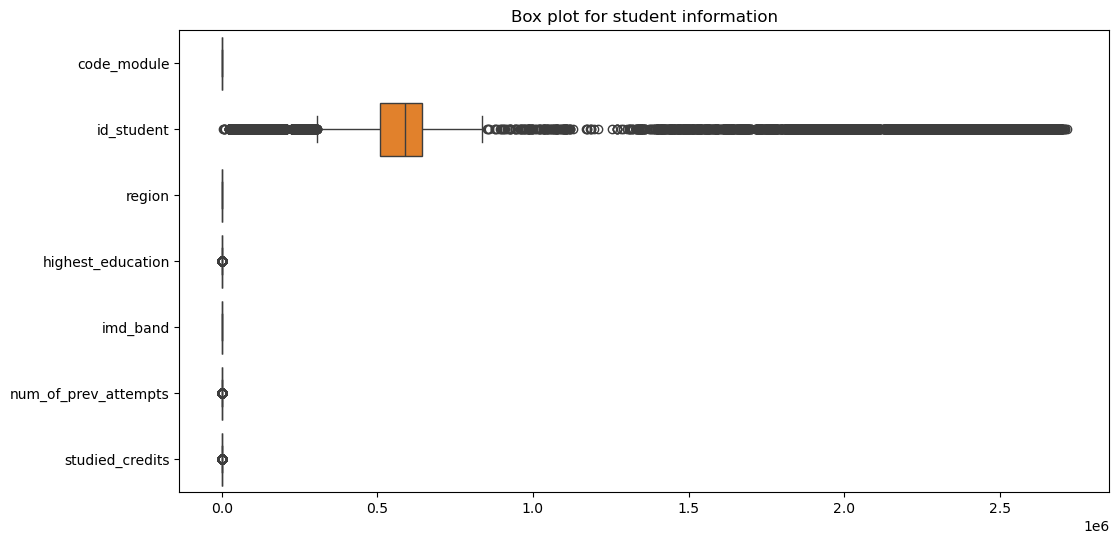

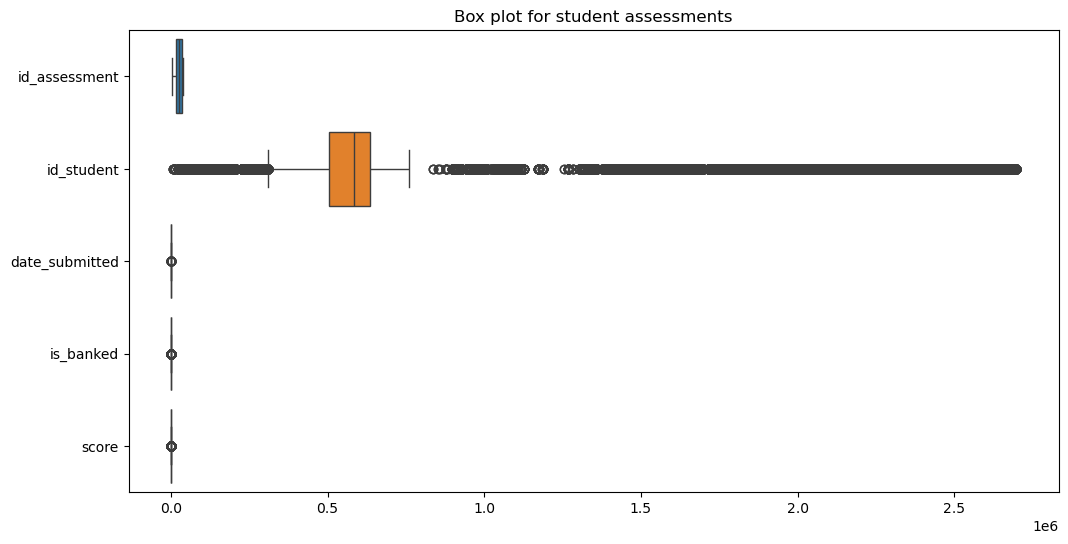

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Box plot for tables
plt.figure(figsize=(12, 6))
sns.boxplot(data=assessments_clean, orient="h")
plt.title("Box plot for assessments")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=courses_clean, orient="h")
plt.title("Box plot for courses")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=student_vle_clean, orient="h")
plt.title("Box plot for student VLE")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=vle_clean, orient="h")
plt.title("Box plot for VLE")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=student_registration_clean, orient="h")
plt.title("Box plot for student registrations")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=student_info_clean, orient="h")
plt.title("Box plot for student information")
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=student_assessment_clean, orient="h")
plt.title("Box plot for student assessments")
plt.show()


In [64]:
import os
if not os.path.exists('cleaned_data'):
    os.makedirs('cleaned_data')

    assessments.to_csv('./cleaned_data/assessments.csv', index=False)
    courses.to_csv('./cleaned_data/courses.csv', index=False)
    student_info.to_csv('./cleaned_data/student_info.csv', index=False)
    vle.to_csv('./cleaned_data/vle.csv', index=False)
    student_registration.to_csv('./cleaned_data/student_registration.csv', index=False)
    student_assessment.to_csv('./cleaned_data/student_assessment.csv', index=False)
    student_vle.to_csv('./cleaned_data/student_vle.csv', index=False)

## Step 3: SQL Database

### Step 3.1: Building database

In [66]:
# Creating and populating the SQLite database
import sqlite3
con = sqlite3.connect('database.db')
cursor = con.cursor()

cursor.execute("PRAGMA foreign_keys = ON;")

cursor.executescript("""CREATE TABLE courses (
    code_module VARCHAR(45),
    code_presentation VARCHAR(45),
    module_presentation_length INT,
    presentation_period date,
   
    PRIMARY KEY (code_module, code_presentation)
);

CREATE TABLE assessments (
    id_assessment INT PRIMARY KEY,
    code_module VARCHAR(45),
    code_presentation VARCHAR(45),
    assessment_type VARCHAR(45),
    weight float,
    date INT
);

CREATE TABLE student_info (
    id_student INT,
    code_module VARCHAR(45),
    code_presentation VARCHAR(45),
    gender VARCHAR(3),
    imd_band VARCHAR(16),
    highest_education VARCHAR(45),
    age_band VARCHAR(16),
    num_of_prev_attempts INT,
    studied_credits INT,
    region VARCHAR(45),
    disability VARCHAR(3),
    final_result VARCHAR(45),
    PRIMARY KEY (id_student, code_module, code_presentation)
);

CREATE TABLE student_registration (
    id_student INT,
    code_module VARCHAR(45),
    code_presentation VARCHAR(45),
    date_registration INT,
    date_unregistration INT,
    PRIMARY KEY (id_student, code_module, code_presentation)
);

CREATE TABLE student_assessment (
    id_student INT,
    id_assessment INT,
    date_submitted INT,
    is_banked TINYINT,
    score FLOAT,
    PRIMARY KEY (id_student, id_assessment)
);

CREATE TABLE vle (
    id_site INT PRIMARY KEY,
    code_module VARCHAR(45),
    code_presentation VARCHAR(45),
    activity_type VARCHAR(45),
    week_from INT,
    week_to INT
);

CREATE TABLE student_vle (
    id_site INT,
    id_student INT,
    code_module VARCHAR(45),
    code_presentation VARCHAR(45),
    date INT,
    sum_click INT,
    PRIMARY KEY (id_student, code_presentation, id_site, date, code_module)
);
""")
# Inserting data into the tables
student_assessment.to_sql('student_assessment', con, if_exists='append', index=False)
student_info.to_sql('student_info', con, if_exists='append', index=False)
student_registration.to_sql('student_registration', con, if_exists='append', index=False)
vle.to_sql('vle', con, if_exists='append', index=False)
student_vle.to_sql('student_vle', con, if_exists='append', index=False)
courses.to_sql('courses', con, if_exists='append', index=False)
assessments.to_sql('assessments', con, if_exists='append', index=False)


206

### Step 3.2: SQL Queries

In [5]:
import plotly.express as px
import sqlite3
import pandas as pd
con = sqlite3.connect('database.db')

In [83]:
# Pass rate percentage for each module and presentation
pass_rate=pd.read_sql_query("""SELECT 
                    code_module,
                    code_presentation,
                    COUNT(*) AS total_students,
                    SUM(CASE WHEN final_result='Pass' THEN 1 ELSE 0 END) AS passed,
                    ROUND(100.0 * SUM(CASE WHEN final_result='Pass' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pass_rate_percentage
                    FROM student_info
                    GROUP BY code_module, code_presentation;""", con)
pass_rate.sort_values(by='pass_rate_percentage', ascending=False)

,code_module,code_presentation,total_students,passed,pass_rate_percentage
0,AAA,2013J,383,258,67.36
1,AAA,2014J,365,229,62.74
19,GGG,2013J,952,451,47.37
12,EEE,2013J,1052,482,45.82
14,EEE,2014J,1188,527,44.36
5,BBB,2014J,2292,972,42.41
21,GGG,2014J,749,317,42.32
20,GGG,2014B,833,350,42.02
15,FFF,2013B,1614,664,41.14
13,EEE,2014B,694,285,41.07


In [86]:
px.bar(pass_rate, x='code_module', y='pass_rate_percentage', color='code_presentation', barmode='group',
       title='Pass Rate Percentage by Module and Presentation',
       labels={'pass_rate_percentage': 'Pass Rate (%)'},
       height=400)

In [110]:
#rate of unregistered students
unreg_rate=pd.read_sql_query("""SELECT 
                                code_module,
                                code_presentation,
                                COUNT(*) AS total_registered,
                                SUM(CASE WHEN date_unregistration IS NOT NULL THEN 1 ELSE 0 END) AS dropped_out,
                                ROUND(100.0 * SUM(CASE WHEN date_unregistration IS NOT NULL THEN 1 ELSE 0 END) / COUNT(*), 2) AS dropout_rate
                                FROM student_registration
                                GROUP BY code_module, code_presentation;""", con)
unreg_rate.sort_values(by='dropout_rate', ascending=False)

,code_module,code_presentation,total_registered,dropped_out,dropout_rate
6,CCC,2014B,1936,898,46.38
7,CCC,2014J,2498,1049,41.99
10,DDD,2014B,1228,489,39.82
9,DDD,2013J,1938,684,35.29
18,FFF,2014J,2365,831,35.14
11,DDD,2014J,1803,631,35.00
8,DDD,2013B,1303,431,33.08
5,BBB,2014J,2292,736,32.11
17,FFF,2014B,1500,461,30.73
4,BBB,2014B,1613,489,30.32


In [111]:
px.bar(unreg_rate, x='code_module', y='dropout_rate', color='code_presentation', barmode='group',
       title='Unregistered Rate by Module and Presentation',
       labels={'dropout_rate': 'Unregistered Rate (%)'},
       height=400)

In [112]:
#average number of previous attempts for each module and presentation
avg_attempts=pd.read_sql_query("""SELECT 
                                code_module,
                                code_presentation,
                                COUNT(*) AS avg_attempts
                                FROM student_info
                                WHERE num_of_prev_attempts > 0
                                GROUP BY code_module, code_presentation;""", con)
avg_attempts.sort_values(by='avg_attempts', ascending=False)

,code_module,code_presentation,avg_attempts
1,BBB,2013B,360
12,FFF,2013B,342
2,BBB,2013J,335
9,DDD,2014J,332
15,FFF,2014J,331
7,DDD,2013J,305
13,FFF,2013J,289
8,DDD,2014B,286
14,FFF,2014B,282
6,DDD,2013B,276


In [113]:
px.bar(avg_attempts, x='code_module', y='avg_attempts', color='code_presentation', barmode='group',
       title='Average Previous Attempts by Module and Presentation',
       labels={'avg_attempts': 'Average Attempts'},
       height=400)

In [6]:
#average score for each assessment type in each module and presentation
avg_score=pd.read_sql_query("""SELECT 
                                a.code_module,
                                a.code_presentation,
                                a.assessment_type,
                                AVG(sa.score) AS avg_score
                                FROM assessments a
                                JOIN student_assessment sa ON a.id_assessment = sa.id_assessment
                                GROUP BY a.code_module, a.code_presentation, a.assessment_type;""", con)
avg_score.sort_values(by='avg_score', ascending=False)

,code_module,code_presentation,assessment_type,avg_score
2,BBB,2013B,CMA,88.346207
4,BBB,2013J,CMA,88.079800
6,BBB,2014B,CMA,87.674160
35,GGG,2013J,CMA,87.186983
39,GGG,2014J,CMA,85.869676
37,GGG,2014B,CMA,85.746001
26,EEE,2014J,TMA,82.411273
33,FFF,2014J,CMA,80.618957
24,EEE,2013J,TMA,80.545076
29,FFF,2013J,CMA,79.921329


In [114]:
px.bar(avg_score, x="assessment_type", y="avg_score", color="code_module", facet_col="code_presentation", barmode="group",
    title="Average Score by Assessment Type, Module, and Presentation",
    labels={"avg_score": "Average Score"},
    height=400
).show()


In [115]:
#percentage of students failed in each assessment type for each module and presentation
failed=pd.read_sql_query("""SELECT 
                            a.code_module,
                            a.code_presentation,
                            a.assessment_type,
                            COUNT(CASE WHEN sa.score < 40 THEN 1 END) AS failed_students,
                            COUNT(*) AS total_students,
                            ROUND(100.0 * COUNT(CASE WHEN sa.score < 40 THEN 1 END) / COUNT(*), 2) AS fail_percentage
                            FROM assessments a
                            JOIN student_assessment sa 
                            ON a.id_assessment = sa.id_assessment
                            GROUP BY a.code_module, a.code_presentation, a.assessment_type""", con)
failed.sort_values(by='fail_percentage', ascending=False)

,code_module,code_presentation,assessment_type,failed_students,total_students,fail_percentage
16,DDD,2013B,Exam,98,602,16.28
13,CCC,2014J,Exam,149,1168,12.76
9,CCC,2014B,CMA,480,3920,12.24
8,BBB,2014J,TMA,860,7408,11.61
22,DDD,2014J,Exam,108,950,11.37
10,CCC,2014B,Exam,83,747,11.11
17,DDD,2013B,TMA,493,4519,10.91
21,DDD,2014B,TMA,436,4018,10.85
19,DDD,2013J,TMA,659,6968,9.46
18,DDD,2013J,Exam,90,968,9.30


In [116]:
px.bar(failed, x='assessment_type', y='fail_percentage', color='code_module', facet_col='code_presentation', barmode='group',
       title='Percentage of Students Failed by Assessment Type, Module, and Presentation',
       labels={'fail_percentage': 'Percentage of Failed Students'},
       height=400)

In [5]:
#average total clicks by students for each module, presentation, and final result
avg_total_clicks = pd.read_sql_query("""SELECT 
    sv.code_module,
    sv.code_presentation,
    si.final_result,
    sum(sv.sum_click) AS avg_clicks
FROM student_vle sv
JOIN student_info si 
    ON sv.id_student = si.id_student 
    AND sv.code_module = si.code_module 
    AND sv.code_presentation = si.code_presentation
GROUP BY sv.code_module, sv.code_presentation, si.final_result;""", con)
avg_total_clicks.sort_values(by='avg_clicks', ascending=False)

,code_module,code_presentation,final_result,avg_clicks
66,FFF,2013J,Pass,3135718
74,FFF,2014J,Pass,3032792
62,FFF,2013B,Pass,2582200
70,FFF,2014B,Pass,1782104
72,FFF,2014J,Distinction,1323116
...,...,...,...,...
1,AAA,2013J,Fail,29711
5,AAA,2014J,Fail,25496
87,GGG,2014J,Withdrawn,9989
83,GGG,2014B,Withdrawn,9321


In [ ]:
#total clicks by each student for each module and presentation
total_clicks=pd.read_sql_query("""SELECT 
                                    id_student,
                                    code_module,
                                    code_presentation,
                                    SUM(sum_click) AS total_clicks
                                    FROM student_vle
                                    GROUP BY id_student, code_module, code_presentation;""", con)
total_clicks.sort_values(by='total_clicks', ascending=False)

,id_student,code_module,code_presentation,total_clicks
430,80868,CCC,2014J,23513
7776,517269,FFF,2013B,20917
17924,611417,CCC,2014J,20116
3728,368315,FFF,2013J,19545
21964,644361,FFF,2014J,19157
...,...,...,...,...
7967,521496,BBB,2013B,1
7871,519449,DDD,2013J,1
18154,613227,GGG,2014B,1
14431,588485,DDD,2013J,1


In [ ]:
#top scoring student who passed without any previous attempts for each module and presentation
rank = pd.read_sql_query("""WITH RankedScores AS (
    SELECT 
        si.code_module,
        si.code_presentation,
        si.id_student,
        sa.score,
        RANK() OVER (
            PARTITION BY si.code_module, si.code_presentation
            ORDER BY sa.score DESC
        ) AS rank_in_module
    FROM student_info si
    JOIN student_assessment sa 
        ON si.id_student = sa.id_student
    WHERE si.final_result = 'Pass'
      AND si.num_of_prev_attempts = 0
      AND sa.score IS NOT NULL
)
SELECT 
    code_module,
    code_presentation,
    id_student,
    score
FROM RankedScores
WHERE rank_in_module = 1
ORDER BY code_module, code_presentation;
""", con)
rank.sort_values(by=['code_module', 'code_presentation'])

,code_module,code_presentation,id_student,score
0,AAA,2013J,2458355,95.0
1,AAA,2014J,2596621,95.0
2,BBB,2013B,25107,100.0
3,BBB,2013B,25107,100.0
4,BBB,2013B,25107,100.0
...,...,...,...,...
10171,GGG,2014J,2533195,100.0
10172,GGG,2014J,2606765,100.0
10173,GGG,2014J,2606765,100.0
10174,GGG,2014J,2648187,100.0


In [ ]:
#comprehensive performance report for each module and presentation
performance = pd.read_sql_query("""SELECT
    si.code_module,
    si.code_presentation,

    COUNT(DISTINCT si.id_student) AS total_registered_students,

    COUNT(DISTINCT CASE WHEN sr.date_unregistration IS NOT NULL THEN si.id_student END) AS unregistered_students,

    COUNT(DISTINCT CASE WHEN si.final_result = 'Pass' THEN si.id_student END) AS passed_students,

    AVG(sa.score) AS avg_score,

    COUNT(DISTINCT sa.id_assessment) AS total_assessments_attempted

FROM student_info si
LEFT JOIN student_registration sr
    ON si.id_student = sr.id_student
   AND si.code_module = sr.code_module
   AND si.code_presentation = sr.code_presentation
LEFT JOIN student_assessment sa
    ON si.id_student = sa.id_student
LEFT JOIN assessments a
    ON sa.id_assessment = a.id_assessment
   AND si.code_module = a.code_module
   AND si.code_presentation = a.code_presentation

GROUP BY si.code_module, si.code_presentation
ORDER BY si.code_module, si.code_presentation;

""", con)
performance.sort_values(by='code_presentation')

,code_module,code_presentation,total_registered_students,unregistered_students,passed_students,avg_score,total_assessments_attempted
2,BBB,2013B,1767,505,648,78.736547,89
15,FFF,2013B,1614,411,664,77.391727,91
8,DDD,2013B,1303,431,456,69.381764,119
0,AAA,2013J,383,60,258,69.426795,22
19,GGG,2013J,952,65,451,79.905272,52
3,BBB,2013J,2237,647,896,78.628365,69
16,FFF,2013J,2283,677,908,76.618115,121
9,DDD,2013J,1938,684,731,69.809118,123
12,EEE,2013J,1052,243,482,75.035613,89
17,FFF,2014B,1500,461,547,76.058612,122
